## Loops & Dictionaries (10 minutes)
Create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values.

1. Create an empty dictionary named `recipes`.
1. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
1. For each key, the **value** should be another dictionary consisting of `ingredient: amount` pairs. (eg `'sugar': 'two cups'`) Each dish should have three ingredients.
1. Write a function to process the recipe dictionary. This function should loop through the recipes and return a single list of all ingredients for all recipes.

In [ ]:
#1 
recipes = {}

In [2]:
#2 & #3
recipes = {'pizza': {'dough': '5g'}, 'veggie': {'okra': '10g'}, 'pie': {'cherry':'5g'}}

In [6]:
#4
ing=[]
for k, v in recipes.items():
    ing.append(v.keys())
ing

[dict_keys(['dough']), dict_keys(['okra']), dict_keys(['cherry'])]

## Coding Readibility (5 Minutes)
Rewrite the code below in using best practices:
```python
def blabla():
for i in range ( 10 ):for j in range( 10 ):for k in range(10): print( i,j,k ) return everything
```

In [8]:
def blabla():
    for i in range ( 10 ):
        for j in range( 10 ):
            for k in range(10): 
                print( i,j,k )
    return everything


## Data cleaning (15 Minutes)
read data from http://rattle.togaware.com/weatherAUS.csv
1. Add a `day`, `month`, and `year` column (three new columns)
1. Print out the name of the columns where there are missing values
1. Drop all columns except `day`, `month`, `year`, `Rainfall`, and `Sunshine`
1. Fill all missing `Rainfall` values as follows:
  1. If `Sunshine` is over 7.0, set `Rainfall` = 0
  2. Else (including if `Sunshine is NaN`) set `Rainfall` to the mean `Rainfall` value.

In [41]:
import pandas as pd
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [42]:
#1
df['Date']=pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [43]:
#2
df.columns[df.isna().any()].tolist()

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [44]:
#3
df = df.loc[:,('day', 'month', 'year', 'Rainfall', 'Sunshine')]
df.Sunshine.describe()

count    77779.000000
mean         7.649754
std          3.770657
min          0.000000
25%          4.900000
50%          8.500000
75%         10.700000
max         14.500000
Name: Sunshine, dtype: float64

In [45]:
df.Rainfall.describe()

count    153737.000000
mean          2.281795
std           8.475113
min           0.000000
25%           0.000000
50%           0.000000
75%           0.600000
max         474.000000
Name: Rainfall, dtype: float64

In [51]:
#4
df['Rainfall'].fillna(df['Sunshine'].apply(lambda x: 0 if x>7 else df['Rainfall'].mean()), inplace=True)
df['Rainfall'].head(10)

0    0.6
1    0.0
2    0.0
3    0.0
4    1.0
5    0.2
6    0.0
7    0.0
8    0.0
9    1.4
Name: Rainfall, dtype: float64

## Visualization (15 Minutes)

As best you can, recreate this bar chart created in Google Sheets using Python.  You may use Matplotlib, Seaborn, or any other graphing library you came across.
<img src="chart.jpg" alt="chart to recreate" width="500"/>

In [53]:
cat = ['A','B','C','D','E']
con = [54,23,99,37,3]
df1 = pd.DataFrame({'Category':cat, 'Count':con})
df1

,Category,Count
0,A,54
1,B,23
2,C,99
3,D,37
4,E,3


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY


Text(0.5, 1.0, 'Count by Category')

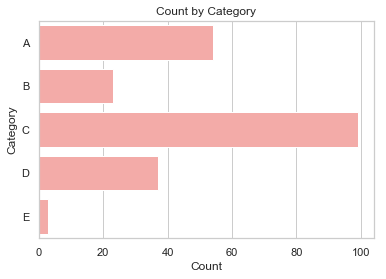

In [58]:
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Category", data=df1, color='r')
plt.title('Count by Category')

# # Add a legend and informative axis label
# ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(0, 24), ylabel="",
#        xlabel="Automobile collisions per billion miles")
# sns.despine(left=True, bottom=True)

## Github (5 Minutes)

Follow the instructions at https://github.com/enkeboll/fis-dc-ds-060319-gifs, and make sure to check your email to confirm your collaborator status!

# Assessment submission (2 Minutes)
Please save this file as `firstname.ipynb` and upload it using [this form](https://docs.google.com/forms/d/e/1FAIpQLSdlnMgc5Nb5uFTmw7DiScapevg-VA8DQdiFeIAil5sZqYZbFA/viewform)